In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
import xarray as xr
import numpy as np
import os
import datetime
import shutil
import glob
import calendar
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tempfile
from PIL import Image

In [2]:
# List of month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
sss_data = 'datasets/cmems_obs-mob_glo_phy-sss_my_multi_P1M_1740653508523.nc'
#current_data = 'datasets/cmems_obs-mob_glo_phy-cur_my_0.25deg_P1M-m_1740187181287.nc'

In [8]:


def plot_sss(sss_data, var0, var1, var3, unit, color):
    # Open the datasets
    data_1 = xr.open_dataset(sss_data)
    data_1 = data_1.sel(latitude=slice(2, 6.9))
    data_1 = data_1.sel(depth=0)
    # Resample SSS data and Density Data
    monthly_sss = data_1[var0].resample(time='1ME').mean()
    monthly_dos = data_1[var1].resample(time='1ME').mean()

    # Create a figure with multiple subplots
    fig, axs = plt.subplots(figsize=(15, 12), nrows=4, ncols=3, subplot_kw={"projection": ccrs.PlateCarree()})
    
    # Looping through each month to plot
    for month_index in range(12):
        ax = axs[month_index // 3, month_index % 3]

        # Select SSS data for the current month
        sss_month = monthly_sss.sel(time=monthly_sss['time'].dt.month == (month_index + 1))

        # Ensuring 2D data by taking the mean over time if the time dimension is still present
        if 'time' in sss_month.dims:
            sss_month_2d = sss_month.mean(dim='time')  
        else:
            sss_month_2d = sss_month  

        # Plotting the SSS contours
        contour = sss_month_2d.plot(ax=ax, cmap=color, add_colorbar=False)

        # Adding contour lines for specific SSS values 
        contour_lines = ax.contour(sss_month_2d.longitude, sss_month_2d.latitude,  sss_month_2d, levels=[35.0, 35.1, 35.2], colors='black', linewidths=2)

        # Adding labels to the contour lines
        ax.clabel(contour_lines, inline=True, fontsize=10, fmt='%0.2f')  # Customize the label format and size
        
        # Set plot titles, coastlines, and gridlines
        ax.set_title(f'{month_names[month_index]}', fontsize=12)
        ax.coastlines(resolution='50m', color='black')
        ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')  
        ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black')  
        ax.add_feature(cfeature.LAND, zorder=100, edgecolor='k')
        ax.gridlines(draw_labels={"bottom": "x", "left": "y"})

    # Vertical colorbar
    cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  
    fig.colorbar(contour, cax=cbar_ax, orientation='vertical', label=f'{var3} {unit}')
    
    
    plt.suptitle(f'Monthly {var3}', y=0.9, fontsize=14)
    
    
    plt.savefig(f'figures/{var3}.png')
    plt.show()

    data_1.close()




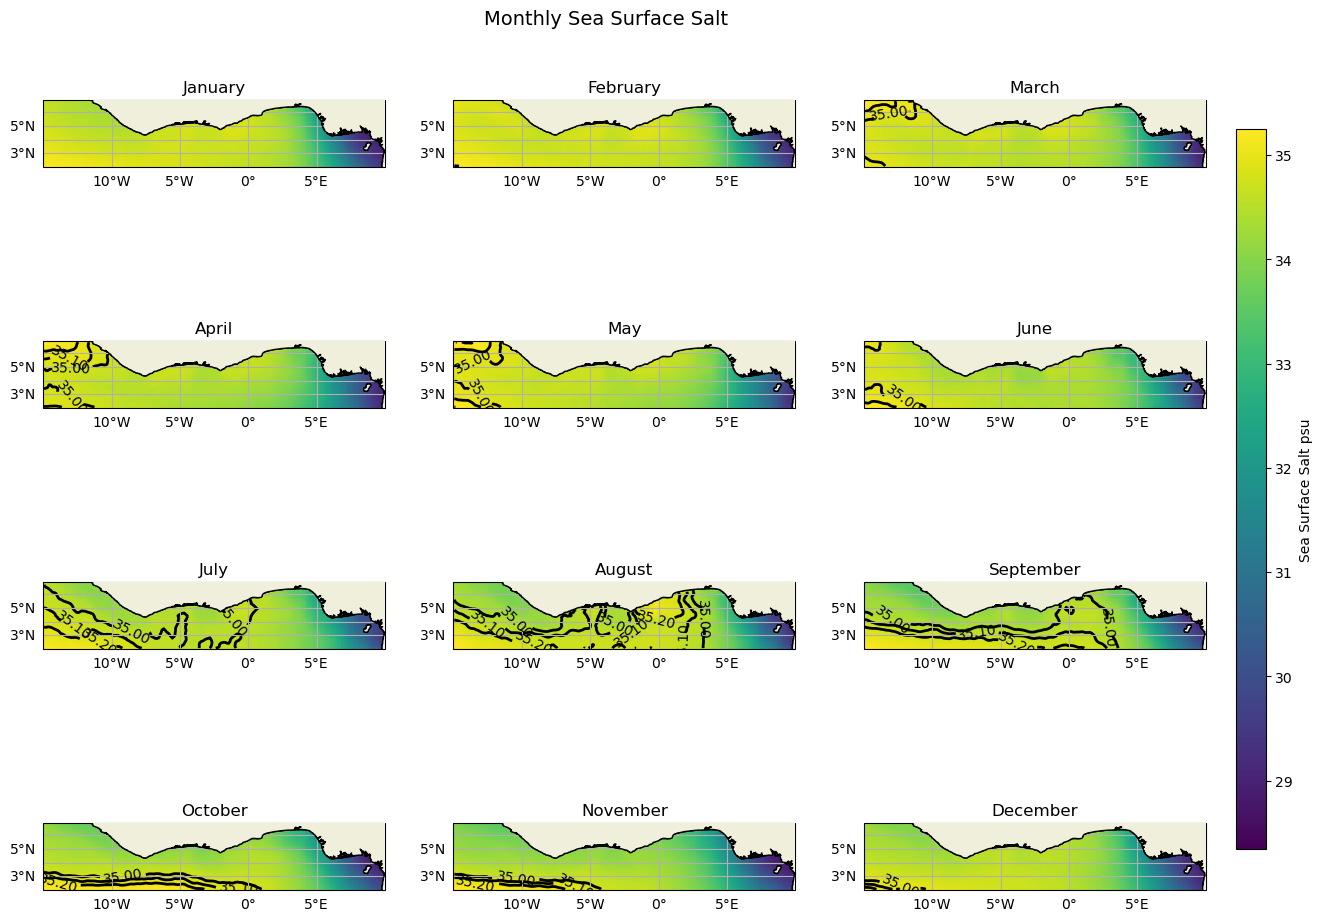

In [9]:
plot_sss(sss_data, 'sos', 'dos', 'Sea Surface Salt', 'psu', 'viridis')